In [1]:
import sys
sys.path.append('../utils/')
sys.path.append('../paviaUTools/')

import matplotlib.pyplot as plt
from datasetLoader import datasetLoader
import os
import numpy as np
from whole_pipeline import whole_pipeline_all, whole_pipeline_divided, whole_pipeline_divided_parallel
import torch
from plots import *
from weights_anal import *
from consts import *
from MetaLearner import HDDOnBands


import gc
torch.cuda.empty_cache()
gc.collect()

%matplotlib inline

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
parent_dir = os.path.join(os.getcwd(),"..")
csv_path = os.path.join(parent_dir, 'datasets', 'paviaU.csv')
gt_path = os.path.join(parent_dir, 'datasets', 'paviaU_gt.csv')
# csv_path = os.path.join(parent_dir, 'datasets', 'pavia.csv')
# gt_path = os.path.join(parent_dir, 'datasets', 'pavia_gt.csv')
# csv_path = os.path.join(parent_dir, 'datasets', 'KSC.csv')
# gt_path = os.path.join(parent_dir, 'datasets', 'KSC_gt.csv')

dsl = datasetLoader(csv_path, gt_path)

df = dsl.read_dataset(gt=False)
X = np.array(df)
X = X.reshape((610,340, 103))
# X = X.reshape((1096, 715, 102))
# X = X.reshape((512, 614, 176))

df = dsl.read_dataset(gt=True)
y = np.array(df)

factor = 29
rows_factor = factor
cols_factor = factor

X = torch.from_numpy(X)
y = torch.from_numpy(y)

X = X.to(device)
y = y.to(device)

In [3]:
# import gc
# torch.cuda.empty_cache()
# gc.collect()

# distances = HDDOnBands.run(X)

# show_distances(distances)


# weights, dist_batches = HDDOnBands.createL1WeightedBatches(X, normalize=False)

# show_weights(weights, is_normalized=False)

# levels = find_levels(weights)
# show_weights(levels, is_normalized=False)

In [4]:
import gc
torch.cuda.empty_cache()
gc.collect()

distances_bands = HDDOnBands.run(X)
train_acc,test_acc, test_preds,test_gt = whole_pipeline_all(X,y, rows_factor, cols_factor, is_normalize_each_band=False, method_label_patch='most_common', method_type = MEAN_DISTANCES, distances_bands=distances_bands)

# train_acc,test_acc, test_preds,test_gt = whole_pipeline_all(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='center')

# confusion_mat(test_gt,test_preds, range(1,12))


XXXXXXX IN METHOD XXXXXXXXX
DEBUG:  torch.Size([22, 12, 29, 29, 103])
X_patches_tmp[i,:].shape:  torch.Size([841])
self.distances_bands[(X_patches_tmp[i,:], X_patches_tmp[j,:])]:  torch.Size([841])
WHOLE METHOD TIME:  2.480609178543091
XXXXXXX IN CLASSIFICATION XXXXXXXXX
total classified:  33997
total classified:  8778
Train Accuracy:  0.8918139835867871
Test Accuracy:  0.607427660059239


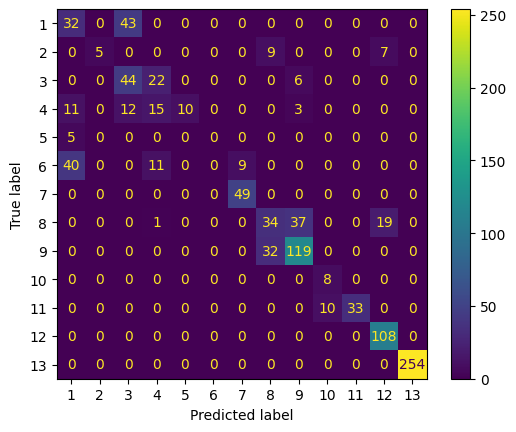

In [24]:
confusion_mat(test_gt,test_preds, range(1,14))

In [25]:
# import gc
# torch.cuda.empty_cache()
# gc.collect()

# weights, dist_batches = HDDOnBands.createUniformWeightedBatches(X, clusters_amount=2)


# train_acc,test_acc, test_preds,test_gt = whole_pipeline_divided_parallel(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='most_common', weights=weights, distance_batches= dist_batches)

# confusion_mat(test_gt, test_preds, range(1,10))
